In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('bank-full.csv', sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data=df[['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']]

In [5]:
data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
from sklearn.model_selection import train_test_split
data_full_train,data_test=train_test_split(data,test_size=0.2,random_state=1)
data_train,data_val=train_test_split(data,test_size=0.25,random_state=1)

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [7]:
numerical=['balance',
'day',
'duration',
'previous']

In [8]:
categorical=['age',
'job',
'marital',
'education',
'housing',
'contact',
'month',
'campaign',
'pdays',
'poutcome',
'y']

In [9]:
data_train['y'] = data_train['y'].map({'yes': 1, 'no': 0})
data_val['y'] = data_val['y'].map({'yes': 1, 'no': 0})
data_test['y'] = data_test['y'].map({'yes': 1, 'no': 0})

In [10]:
y_train=data_train['y'].values
y_val=data_val['y'].values
y_test=data_test['y'].values

In [11]:
from sklearn.metrics import roc_auc_score
ROC_AUC_feature_importance=[]
for num in numerical:
    if roc_auc_score(y_train,data_train[num])>0.5:
        score = roc_auc_score(y_train,data_train[num])
    else:
        score = roc_auc_score(y_train,-data_train[num])
    ROC_AUC_feature_importance.append((num, score))

In [12]:
ROC_AUC_feature_importance

[('balance', np.float64(0.5925039928796861)),
 ('day', np.float64(0.5271368188970291)),
 ('duration', np.float64(0.8117171432689722)),
 ('previous', np.float64(0.5994010001038775))]

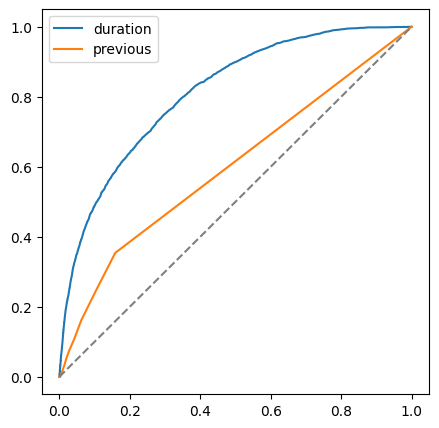

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

fpr , tpr,_ = roc_curve(y_train,data_train.duration)
plt.plot(fpr, tpr, label='duration')

fpr , tpr,_ = roc_curve(y_train,data_train.previous)
plt.plot(fpr , tpr , label='previous')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [14]:
from sklearn.feature_extraction import DictVectorizer

dicts=data_train.to_dict(orient='records')

dv=DictVectorizer(sparse=False)
dv.fit(dicts)
X_train_transformed=dv.transform(dicts)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_transformed,y_train)

dicts = data_val.to_dict(orient='records')
data_val_transformed=dv.fit_transform(dicts)

y_pred=model.predict_proba(data_val_transformed)[:,1]

In [15]:
y_pred

array([0.00106394, 0.00225418, 0.00935417, ..., 0.00394494, 0.00676273,
       0.00126285], shape=(11303,))

In [16]:
roc_auc_score(y_val,y_pred)

np.float64(0.9999997700689562)

In [17]:
start = 0
end = 1
step = 0.01

# Calculate the number of samples needed
num_samples = int((end - start) / step) + 1

# Generate the array
thresholds = np.linspace(start, end, num_samples)

In [18]:
def tp_tn(y_val,y_pred):
    precision_list = []
    recall_list = []
    true_pos=[]
    true_neg=[]
    false_pos=[]
    false_neg=[]
    f1_score=[]
    for t in thresholds:
        actual_positive=(y_val==1)
        actual_negative=(y_val==0)

        predict_positive=(y_pred>=t)
        predict_negative=(y_pred<t)

        tp=(predict_positive & actual_positive).sum()
        tn=(predict_negative & actual_negative).sum()
        fp=(predict_positive & actual_negative).sum()
        fn=(predict_negative & actual_positive).sum()

        precision = tp / (tp + fp) if (tp + fp) > 0 else np.nan 
        recall = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        f1=2*precision*recall/(precision+recall)
        
        precision_list.append(precision) 
        recall_list.append(recall) 
        true_pos.append(tp)
        true_neg.append(tn)
        false_pos.append(fp)
        false_neg.append(fn)
        f1_score.append(f1)
    return np.column_stack((thresholds,true_pos,true_neg,false_pos,false_neg,precision_list, recall_list,f1_score))


precision=tp_tn(y_val,y_pred)[:,5]  
recall=tp_tn(y_val,y_pred)[:,6]

In [19]:
df_scores=pd.DataFrame(tp_tn(y_val,y_pred),columns=['thresholds','true_pos','true_neg','false_pos','false_neg','precision', 'recall','f1'])

In [20]:
df_scores.head(15)

,thresholds,true_pos,true_neg,false_pos,false_neg,precision,recall,f1
0,0.00,1305.0,0.0,9998.0,0.0,0.115456,1.000000,0.207011
1,0.01,1305.0,9735.0,263.0,0.0,0.832270,1.000000,0.908458
2,0.02,1305.0,9939.0,59.0,0.0,0.956745,1.000000,0.977894
3,0.03,1305.0,9973.0,25.0,0.0,0.981203,1.000000,0.990512
4,0.04,1305.0,9986.0,12.0,0.0,0.990888,1.000000,0.995423
5,0.05,1305.0,9990.0,8.0,0.0,0.993907,1.000000,0.996944
6,0.06,1305.0,9991.0,7.0,0.0,0.994665,1.000000,0.997325
7,0.07,1305.0,9992.0,6.0,0.0,0.995423,1.000000,0.997706
8,0.08,1305.0,9994.0,4.0,0.0,0.996944,1.000000,0.998470
9,0.09,1305.0,9995.0,3.0,0.0,0.997706,1.000000,0.998852


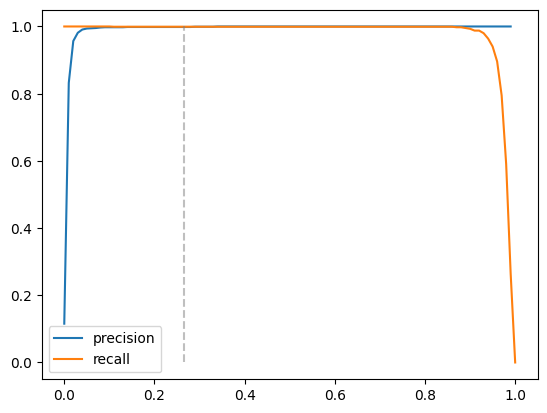

In [21]:
plt.plot(df_scores.thresholds, df_scores.precision, label='precision')
plt.plot(df_scores.thresholds, df_scores.recall, label='recall')

plt.vlines(0.265, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()